# Учим VGG-Unet-with-crop по 3-м каналам с BN на входе
# Предсказываем границу

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.5):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [3]:
!nvidia-smi

Tue Nov 28 08:28:02 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    73W / 149W |   5807MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import os
import re
import json

import unet
import dataset
import train_test_loader
import learning_experiment as lexperiment

import datetime

from shutil import copyfile

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
net = unet.VGGUnetModelWithCrop(N=20)

In [7]:
net.net_description

{'N': 20,
 'input_shape': (324, 324, 3),
 'name': 'vgg-unet-with-crop',
 'output_shape': (116, 116, 1)}

In [8]:
DESCRIPTION = u"""
Учим VGG-Unet-with-crop по 3м каналам RGB с BN на входе
Учим границу
Experiment_2017_11_26_24
"""
experiment = lexperiment.create_experiment(DESCRIPTION, 
                               dataset.DataSet("./dataset/trainset", [dataset.ChannelRGB_PanSharpen], only_border=True))

Create experiment in directory: ./experiments/2017-11-26 13:16:16.045553


In [16]:
data_set = experiment.data_set

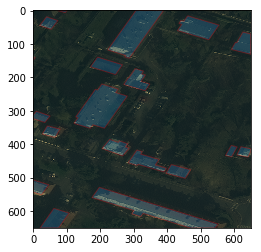

In [10]:
data_set.draw(data_set.test_ids[30])

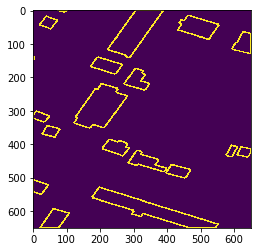

In [12]:
plt.imshow(data_set.get_mask(data_set.test_ids[30]))

In [13]:
net.load_vgg_weights()

In [13]:
for l in net.vgg_layers:
    l.trainable = False

In [17]:
from keras.optimizers import Adam, Nadam

net.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy')

In [18]:
batch_generator = lexperiment.BatchGenerator(data_set, data_set.train_ids, shuffle_on_each_epoch=True, 
                                             input_size=net.input_shape[1], crop=104, random_rotation_amplitude=5)

In [17]:
experiment.train(net, batch_generator, epochs=120)

epoch: 0, loss: 0.966311
epoch: 0, loss: 0.826654
epoch: 0, loss: 0.723737
epoch: 0, loss: 0.602601
epoch: 0, loss: 0.519229
epoch: 0, loss: 0.428990
epoch: 0, loss: 0.420694
epoch: 0, loss: 0.308688
epoch: 0, loss: 0.246707
epoch: 0, loss: 0.178676
epoch: 0, loss: 0.106761
epoch: 0, loss: 0.155572
epoch: 0, loss: 0.145902
epoch: 0, loss: 0.094790
epoch: 0, loss: 0.206897
epoch: 0, loss: 0.120279
epoch: 0, loss: 0.146459
epoch: 0, loss: 0.167096
epoch: 0, loss: 0.049058
epoch: 0, loss: 0.176494
epoch: 0, loss: 0.084204
epoch: 0, loss: 0.170201
epoch: 0, loss: 0.133849
epoch: 0, loss: 0.092537
epoch: 0, loss: 0.081285
epoch: 0, loss: 0.128552
epoch: 0, loss: 0.079225
epoch: 0, loss: 0.073842
epoch: 0, loss: 0.037541
epoch: 0, loss: 0.075884
epoch: 0, loss: 0.247667
epoch: 0, loss: 0.184541
epoch: 0, loss: 0.087592
epoch: 0, loss: 0.061826
epoch: 0, loss: 0.024510
epoch: 0, loss: 0.036742
epoch: 0, loss: 0.081446
epoch: 0, loss: 0.107206
epoch: 0, loss: 0.116823
epoch: 0, loss: 0.046003


epoch: 5, loss: 0.085404
epoch: 5, loss: 0.073931
epoch: 5, loss: 0.104791
epoch: 5, loss: 0.068343
epoch: 5, loss: 0.044723
epoch: 5, loss: 0.127842
epoch: 5, loss: 0.124877
epoch: 5, loss: 0.041130
epoch: 5, loss: 0.068700
epoch: 5, loss: 0.079612
epoch: 5, loss: 0.029033
epoch: 5, loss: 0.080152
epoch: 5, loss: 0.016977
epoch: 5, loss: 0.044401
epoch: 5, loss: 0.085093
epoch: 5, loss: 0.081830
epoch: 5, loss: 0.047760
epoch: 5, loss: 0.007262
epoch: 5, loss: 0.093887
epoch: 5, loss: 0.128999
epoch: 5, loss: 0.135359
epoch: 5, loss: 0.069083
epoch: 5, loss: 0.080542
epoch: 5, loss: 0.081669
epoch: 5, loss: 0.048585
epoch: 5, loss: 0.054846
epoch: 5, loss: 0.146562
epoch: 5, loss: 0.011923
epoch: 5, loss: 0.040236
epoch: 5, loss: 0.095348
epoch: 5, loss: 0.107835
epoch: 5, loss: 0.137111
epoch: 5, loss: 0.074769
epoch: 5, loss: 0.101480
epoch: 5, loss: 0.040007
epoch: 5, loss: 0.078560
epoch: 5, loss: 0.057144
epoch: 5, loss: 0.050730
epoch: 5, loss: 0.017846
epoch: 5, loss: 0.069009


epoch: 10, loss: 0.061279
epoch: 10, loss: 0.094088
epoch: 10, loss: 0.035922
epoch: 10, loss: 0.062862
epoch: 10, loss: 0.057582
epoch: 10, loss: 0.124302
epoch: 10, loss: 0.114390
epoch: 10, loss: 0.114368
epoch: 10, loss: 0.117185
epoch: 10, loss: 0.041107
epoch: 10, loss: 0.103058
epoch: 10, loss: 0.047762
epoch: 10, loss: 0.050761
epoch: 10, loss: 0.061604
epoch: 10, loss: 0.049282
epoch: 10, loss: 0.031482
epoch: 10, loss: 0.061181
epoch: 10, loss: 0.114987
epoch: 10, loss: 0.061849
epoch: 10, loss: 0.138171
epoch: 10, loss: 0.077359
epoch: 10, loss: 0.075325
epoch: 10, loss: 0.068298
epoch: 10, loss: 0.087865
epoch: 10, loss: 0.113381
epoch: 10, loss: 0.070068
epoch: 10, loss: 0.133997
epoch: 10, loss: 0.051845
epoch: 10, loss: 0.109863
epoch: 10, loss: 0.031471
epoch: 10, loss: 0.038820
epoch: 10, loss: 0.034662
epoch: 10, loss: 0.074880
epoch: 10, loss: 0.018984
epoch: 10, loss: 0.075956
epoch: 10, loss: 0.032158
epoch: 10, loss: 0.005093
epoch: 10, loss: 0.065217
epoch: 10, l

KeyboardInterrupt: 

In [18]:
net.optimizer.lr.assign(5e-5)

<tf.Tensor 'Assign_46:0' shape=() dtype=float32_ref>

In [19]:
experiment.train(net, batch_generator, epochs=108)

epoch: 13, loss: 0.065539
epoch: 13, loss: 0.048480
epoch: 13, loss: 0.071662
epoch: 13, loss: 0.037388
epoch: 13, loss: 0.041394
epoch: 13, loss: 0.045427
epoch: 13, loss: 0.073667
epoch: 13, loss: 0.083815
epoch: 13, loss: 0.028355
epoch: 13, loss: 0.088305
epoch: 13, loss: 0.074454
epoch: 13, loss: 0.052823
epoch: 13, loss: 0.045282
epoch: 13, loss: 0.055378
epoch: 13, loss: 0.038222
epoch: 13, loss: 0.034135
epoch: 13, loss: 0.018655
epoch: 13, loss: 0.094291
epoch: 13, loss: 0.066984
epoch: 13, loss: 0.071851
epoch: 13, loss: 0.072406
epoch: 13, loss: 0.069265
epoch: 13, loss: 0.089446
epoch: 13, loss: 0.022793
epoch: 13, loss: 0.104661
epoch: 13, loss: 0.065415
epoch: 13, loss: 0.049872
epoch: 13, loss: 0.019922
epoch: 13, loss: 0.079385
epoch: 13, loss: 0.067153
epoch: 13, loss: 0.069018
epoch: 13, loss: 0.040462
epoch: 13, loss: 0.065951
epoch: 13, loss: 0.079609
epoch: 13, loss: 0.033484
epoch: 13, loss: 0.087518
epoch: 13, loss: 0.097391
epoch: 13, loss: 0.082333
epoch: 13, l

epoch: 17, loss: 0.072746
epoch: 17, loss: 0.052936
epoch: 17, loss: 0.025417
epoch: 17, loss: 0.054494
epoch: 17, loss: 0.049076
epoch: 17, loss: 0.030839
epoch: 17, loss: 0.104306
epoch: 17, loss: 0.079169
epoch: 17, loss: 0.161812
epoch: 18, loss: 0.056010
epoch: 18, loss: 0.069805
epoch: 18, loss: 0.047390
epoch: 18, loss: 0.098484
epoch: 18, loss: 0.028665
epoch: 18, loss: 0.085836
epoch: 18, loss: 0.088274
epoch: 18, loss: 0.042509
epoch: 18, loss: 0.047870
epoch: 18, loss: 0.040502
epoch: 18, loss: 0.095317
epoch: 18, loss: 0.026182
epoch: 18, loss: 0.041500
epoch: 18, loss: 0.131955
epoch: 18, loss: 0.014980
epoch: 18, loss: 0.008575
epoch: 18, loss: 0.102962
epoch: 18, loss: 0.019463
epoch: 18, loss: 0.075350
epoch: 18, loss: 0.073508
epoch: 18, loss: 0.039461
epoch: 18, loss: 0.060482
epoch: 18, loss: 0.111001
epoch: 18, loss: 0.085604
epoch: 18, loss: 0.076016
epoch: 18, loss: 0.049777
epoch: 18, loss: 0.063314
epoch: 18, loss: 0.074925
epoch: 18, loss: 0.031083
epoch: 18, l

epoch: 22, loss: 0.065705
epoch: 22, loss: 0.046835
epoch: 22, loss: 0.075582
epoch: 22, loss: 0.011192
epoch: 22, loss: 0.083561
epoch: 22, loss: 0.052894
epoch: 22, loss: 0.035675
epoch: 22, loss: 0.126763
epoch: 22, loss: 0.055539
epoch: 22, loss: 0.042956
epoch: 22, loss: 0.059274
epoch: 22, loss: 0.103393
epoch: 22, loss: 0.031474
epoch: 22, loss: 0.104647
epoch: 22, loss: 0.045885
epoch: 22, loss: 0.057081
epoch: 22, loss: 0.078654
epoch: 22, loss: 0.124534
epoch: 23, loss: 0.008714
epoch: 23, loss: 0.007471
epoch: 23, loss: 0.059638
epoch: 23, loss: 0.060069
epoch: 23, loss: 0.083062
epoch: 23, loss: 0.039170
epoch: 23, loss: 0.019985
epoch: 23, loss: 0.049992
epoch: 23, loss: 0.083503
epoch: 23, loss: 0.158522
epoch: 23, loss: 0.038397
epoch: 23, loss: 0.021760
epoch: 23, loss: 0.076110
epoch: 23, loss: 0.103610
epoch: 23, loss: 0.104479
epoch: 23, loss: 0.023175
epoch: 23, loss: 0.027885
epoch: 23, loss: 0.023302
epoch: 23, loss: 0.032408
epoch: 23, loss: 0.066859
epoch: 23, l

epoch: 27, loss: 0.112793
epoch: 27, loss: 0.087320
epoch: 27, loss: 0.088355
epoch: 27, loss: 0.023470
epoch: 27, loss: 0.081363
epoch: 27, loss: 0.033058
epoch: 27, loss: 0.051518
epoch: 27, loss: 0.056135
epoch: 27, loss: 0.100005
epoch: 27, loss: 0.064737
epoch: 27, loss: 0.039454
epoch: 27, loss: 0.042432
epoch: 27, loss: 0.024108
epoch: 27, loss: 0.049290
epoch: 27, loss: 0.073765
epoch: 27, loss: 0.046816
epoch: 27, loss: 0.063349
epoch: 27, loss: 0.107634
epoch: 27, loss: 0.067445
epoch: 27, loss: 0.046844
epoch: 27, loss: 0.051861
epoch: 27, loss: 0.113680
epoch: 27, loss: 0.061483
epoch: 27, loss: 0.040304
epoch: 27, loss: 0.058626
epoch: 27, loss: 0.045718
epoch: 27, loss: 0.090503
epoch: 28, loss: 0.015579
epoch: 28, loss: 0.201835
epoch: 28, loss: 0.079502
epoch: 28, loss: 0.053961
epoch: 28, loss: 0.067196
epoch: 28, loss: 0.086956
epoch: 28, loss: 0.046811
epoch: 28, loss: 0.041298
epoch: 28, loss: 0.056184
epoch: 28, loss: 0.123091
epoch: 28, loss: 0.076581
epoch: 28, l

epoch: 32, loss: 0.057547
epoch: 32, loss: 0.012673
epoch: 32, loss: 0.057378
epoch: 32, loss: 0.083123
epoch: 32, loss: 0.048890
epoch: 32, loss: 0.054403
epoch: 32, loss: 0.059670
epoch: 32, loss: 0.003364
epoch: 32, loss: 0.022825
epoch: 32, loss: 0.013172
epoch: 32, loss: 0.075510
epoch: 32, loss: 0.011380
epoch: 32, loss: 0.055422
epoch: 32, loss: 0.068698
epoch: 32, loss: 0.048402
epoch: 32, loss: 0.048823
epoch: 32, loss: 0.055274
epoch: 32, loss: 0.055877
epoch: 32, loss: 0.157421
epoch: 32, loss: 0.066604
epoch: 32, loss: 0.034118
epoch: 32, loss: 0.026983
epoch: 32, loss: 0.024814
epoch: 32, loss: 0.074832
epoch: 32, loss: 0.044501
epoch: 32, loss: 0.076409
epoch: 32, loss: 0.041522
epoch: 32, loss: 0.083807
epoch: 32, loss: 0.034898
epoch: 32, loss: 0.098630
epoch: 32, loss: 0.013453
epoch: 32, loss: 0.157292
epoch: 32, loss: 0.062850
epoch: 32, loss: 0.024006
epoch: 32, loss: 0.115444
epoch: 32, loss: 0.058274
epoch: 33, loss: 0.016357
epoch: 33, loss: 0.060912
epoch: 33, l

IOError: Driver write request failed (file write failed: time = Sun Nov 26 14:06:31 2017
, filename = './experiments/2017-11-26 13:16:16.045553/model/35', file descriptor = 69, errno = 28, error message = 'No space left on device', buf = 0x7fffc3b38ac0, total write size = 96, bytes this sub-write = 96, bytes actually written = 18446744073709551615, offset = 0)

In [19]:
net.optimizer.lr.assign(1e-5)

<tf.Tensor 'Assign_78:0' shape=() dtype=float32_ref>

In [6]:
experiment = lexperiment.LearningExperiment('./experiments/2017-11-26 13:16:16.045553')

In [12]:
net = experiment.load_net()

In [21]:
net.optimizer.lr.assign(0.5e-5)

<tf.Tensor 'Assign_79:0' shape=() dtype=float32_ref>

In [22]:
experiment.train(net, batch_generator, epochs=53)

epoch: 40, loss: 0.109306
epoch: 40, loss: 0.071629
epoch: 40, loss: 0.093524
epoch: 40, loss: 0.040555
epoch: 40, loss: 0.015062
epoch: 40, loss: 0.038417
epoch: 40, loss: 0.071492
epoch: 40, loss: 0.019086
epoch: 40, loss: 0.018373
epoch: 40, loss: 0.051127
epoch: 40, loss: 0.033435
epoch: 40, loss: 0.021963
epoch: 40, loss: 0.050039
epoch: 40, loss: 0.069499
epoch: 40, loss: 0.014295
epoch: 40, loss: 0.038607
epoch: 40, loss: 0.121043
epoch: 40, loss: 0.068076
epoch: 40, loss: 0.024415
epoch: 40, loss: 0.078690
epoch: 40, loss: 0.046197
epoch: 40, loss: 0.073310
epoch: 40, loss: 0.013202
epoch: 40, loss: 0.106035
epoch: 40, loss: 0.088715
epoch: 40, loss: 0.048618
epoch: 40, loss: 0.121638
epoch: 40, loss: 0.038060
epoch: 40, loss: 0.057301
epoch: 40, loss: 0.060723
epoch: 40, loss: 0.037004
epoch: 40, loss: 0.027972
epoch: 40, loss: 0.103299
epoch: 40, loss: 0.127201
epoch: 40, loss: 0.039350
epoch: 40, loss: 0.044542
epoch: 40, loss: 0.061132
epoch: 40, loss: 0.041447
epoch: 40, l

epoch: 44, loss: 0.060941
epoch: 44, loss: 0.068676
epoch: 44, loss: 0.074580
epoch: 44, loss: 0.086299
epoch: 44, loss: 0.007265
epoch: 44, loss: 0.049281
epoch: 44, loss: 0.028835
epoch: 44, loss: 0.031492
epoch: 44, loss: 0.152920
epoch: 45, loss: 0.084602
epoch: 45, loss: 0.025046
epoch: 45, loss: 0.062326
epoch: 45, loss: 0.016793
epoch: 45, loss: 0.041747
epoch: 45, loss: 0.087669
epoch: 45, loss: 0.044434
epoch: 45, loss: 0.013717
epoch: 45, loss: 0.053849
epoch: 45, loss: 0.034238
epoch: 45, loss: 0.056764
epoch: 45, loss: 0.082910
epoch: 45, loss: 0.057086
epoch: 45, loss: 0.114817
epoch: 45, loss: 0.080864
epoch: 45, loss: 0.099153
epoch: 45, loss: 0.033674
epoch: 45, loss: 0.061334
epoch: 45, loss: 0.039941
epoch: 45, loss: 0.037929
epoch: 45, loss: 0.037124
epoch: 45, loss: 0.043362
epoch: 45, loss: 0.062098
epoch: 45, loss: 0.050816
epoch: 45, loss: 0.082677
epoch: 45, loss: 0.024631
epoch: 45, loss: 0.020498
epoch: 45, loss: 0.104714
epoch: 45, loss: 0.064605
epoch: 45, l

epoch: 49, loss: 0.053415
epoch: 49, loss: 0.033824
epoch: 49, loss: 0.018473
epoch: 49, loss: 0.055382
epoch: 49, loss: 0.081192
epoch: 49, loss: 0.055719
epoch: 49, loss: 0.017164
epoch: 49, loss: 0.034503
epoch: 49, loss: 0.063511
epoch: 49, loss: 0.033749
epoch: 49, loss: 0.081352
epoch: 49, loss: 0.046996
epoch: 49, loss: 0.079975
epoch: 49, loss: 0.015388
epoch: 49, loss: 0.065723
epoch: 49, loss: 0.038596
epoch: 49, loss: 0.047458
epoch: 49, loss: 0.087207
epoch: 50, loss: 0.008150
epoch: 50, loss: 0.045197
epoch: 50, loss: 0.066740
epoch: 50, loss: 0.072313
epoch: 50, loss: 0.089510
epoch: 50, loss: 0.053758
epoch: 50, loss: 0.063309
epoch: 50, loss: 0.069205
epoch: 50, loss: 0.048125
epoch: 50, loss: 0.023444
epoch: 50, loss: 0.034637
epoch: 50, loss: 0.025415
epoch: 50, loss: 0.066156
epoch: 50, loss: 0.071101
epoch: 50, loss: 0.077897
epoch: 50, loss: 0.052829
epoch: 50, loss: 0.046835
epoch: 50, loss: 0.021291
epoch: 50, loss: 0.036684
epoch: 50, loss: 0.075277
epoch: 50, l

epoch: 54, loss: 0.038539
epoch: 54, loss: 0.056043
epoch: 54, loss: 0.092560
epoch: 54, loss: 0.108013
epoch: 54, loss: 0.066136
epoch: 54, loss: 0.062542
epoch: 54, loss: 0.095746
epoch: 54, loss: 0.032410
epoch: 54, loss: 0.147650
epoch: 54, loss: 0.044699
epoch: 54, loss: 0.042818
epoch: 54, loss: 0.125284
epoch: 54, loss: 0.022683
epoch: 54, loss: 0.040604
epoch: 54, loss: 0.068648
epoch: 54, loss: 0.065728
epoch: 54, loss: 0.102505
epoch: 54, loss: 0.064702
epoch: 54, loss: 0.033053
epoch: 54, loss: 0.062964
epoch: 54, loss: 0.026093
epoch: 54, loss: 0.062091
epoch: 54, loss: 0.049657
epoch: 54, loss: 0.022252
epoch: 54, loss: 0.067215
epoch: 54, loss: 0.042519
epoch: 54, loss: 0.097280
epoch: 55, loss: 0.043068
epoch: 55, loss: 0.053276
epoch: 55, loss: 0.089148
epoch: 55, loss: 0.030955
epoch: 55, loss: 0.038218
epoch: 55, loss: 0.066997
epoch: 55, loss: 0.092350
epoch: 55, loss: 0.036612
epoch: 55, loss: 0.031016
epoch: 55, loss: 0.016281
epoch: 55, loss: 0.023516
epoch: 55, l

epoch: 59, loss: 0.041679
epoch: 59, loss: 0.072783
epoch: 59, loss: 0.024052
epoch: 59, loss: 0.070941
epoch: 59, loss: 0.004648
epoch: 59, loss: 0.073647
epoch: 59, loss: 0.047363
epoch: 59, loss: 0.087371
epoch: 59, loss: 0.065655
epoch: 59, loss: 0.063703
epoch: 59, loss: 0.054343
epoch: 59, loss: 0.024073
epoch: 59, loss: 0.038297
epoch: 59, loss: 0.092415
epoch: 59, loss: 0.033682
epoch: 59, loss: 0.060306
epoch: 59, loss: 0.112991
epoch: 59, loss: 0.045784
epoch: 59, loss: 0.036781
epoch: 59, loss: 0.012497
epoch: 59, loss: 0.066252
epoch: 59, loss: 0.047199
epoch: 59, loss: 0.045693
epoch: 59, loss: 0.020740
epoch: 59, loss: 0.020429
epoch: 59, loss: 0.040233
epoch: 59, loss: 0.101352
epoch: 59, loss: 0.064296
epoch: 59, loss: 0.017081
epoch: 59, loss: 0.020149
epoch: 59, loss: 0.055402
epoch: 59, loss: 0.064152
epoch: 59, loss: 0.056057
epoch: 59, loss: 0.038229
epoch: 59, loss: 0.047169
epoch: 59, loss: 0.034898
epoch: 60, loss: 0.021749
epoch: 60, loss: 0.028703
epoch: 60, l

epoch: 64, loss: 0.062277
epoch: 64, loss: 0.076072
epoch: 64, loss: 0.066244
epoch: 64, loss: 0.037633
epoch: 64, loss: 0.015572
epoch: 64, loss: 0.073592
epoch: 64, loss: 0.050463
epoch: 64, loss: 0.069139
epoch: 64, loss: 0.016149
epoch: 64, loss: 0.083730
epoch: 64, loss: 0.063914
epoch: 64, loss: 0.046048
epoch: 64, loss: 0.098809
epoch: 64, loss: 0.070183
epoch: 64, loss: 0.038099
epoch: 64, loss: 0.031049
epoch: 64, loss: 0.037314
epoch: 64, loss: 0.088083
epoch: 64, loss: 0.035641
epoch: 64, loss: 0.051595
epoch: 64, loss: 0.033203
epoch: 64, loss: 0.044413
epoch: 64, loss: 0.018268
epoch: 64, loss: 0.050209
epoch: 64, loss: 0.029394
epoch: 64, loss: 0.076051
epoch: 64, loss: 0.070719
epoch: 64, loss: 0.050350
epoch: 64, loss: 0.037709
epoch: 64, loss: 0.057301
epoch: 64, loss: 0.083761
epoch: 64, loss: 0.091131
epoch: 64, loss: 0.090577
epoch: 64, loss: 0.046662
epoch: 64, loss: 0.033983
epoch: 64, loss: 0.069889
epoch: 64, loss: 0.105541
epoch: 64, loss: 0.053214
epoch: 64, l

epoch: 69, loss: 0.086576
epoch: 69, loss: 0.014285
epoch: 69, loss: 0.065312
epoch: 69, loss: 0.077929
epoch: 69, loss: 0.008376
epoch: 69, loss: 0.056024
epoch: 69, loss: 0.033054
epoch: 69, loss: 0.036310
epoch: 69, loss: 0.111069
epoch: 69, loss: 0.051731
epoch: 69, loss: 0.035449
epoch: 69, loss: 0.043823
epoch: 69, loss: 0.034500
epoch: 69, loss: 0.029209
epoch: 69, loss: 0.015176
epoch: 69, loss: 0.064695
epoch: 69, loss: 0.003206
epoch: 69, loss: 0.032849
epoch: 69, loss: 0.082602
epoch: 69, loss: 0.065896
epoch: 69, loss: 0.081282
epoch: 69, loss: 0.066394
epoch: 69, loss: 0.072914
epoch: 69, loss: 0.036594
epoch: 69, loss: 0.041426
epoch: 69, loss: 0.059554
epoch: 69, loss: 0.017861
epoch: 69, loss: 0.033877
epoch: 69, loss: 0.050004
epoch: 69, loss: 0.046162
epoch: 69, loss: 0.047643
epoch: 69, loss: 0.044365
epoch: 69, loss: 0.039658
epoch: 69, loss: 0.092222
epoch: 69, loss: 0.065989
epoch: 69, loss: 0.029018
epoch: 69, loss: 0.016582
epoch: 69, loss: 0.042785
epoch: 69, l

KeyboardInterrupt: 